Forecast the Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
airline = pd.read_excel('Airlines+Data.xlsx')
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [45]:
airline.shape

(96, 2)

In [46]:
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [47]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [48]:
airline.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [49]:
airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [50]:
airline[airline.duplicated()]

,Month,Passengers


### Visualization

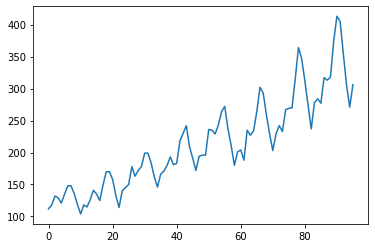

In [51]:
plt.plot(airline['Passengers'])

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

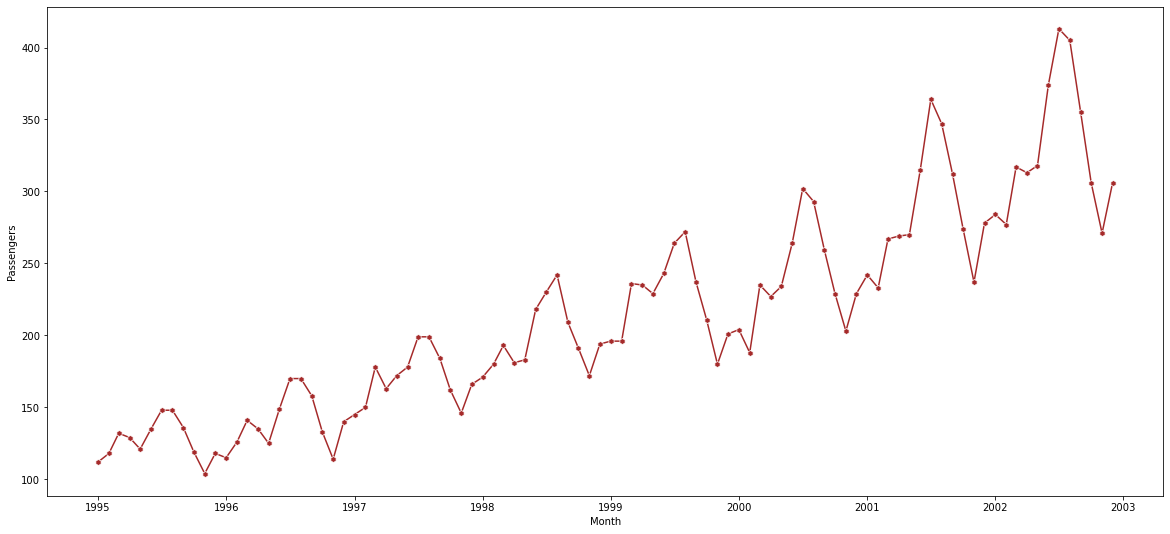

In [52]:
fig, ax = plt.subplots(figsize = (20,9))
sns.lineplot(x = 'Month', y = 'Passengers', data = airline, color = 'brown', marker='h')

In [53]:
airline.rename(columns={'Month':'date'}, inplace=True)

In [54]:
airline

,date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [55]:
airline['Year'] = airline.date.dt.strftime('%Y')
airline['Month'] = airline.date.dt.strftime('%b')
airline['Date'] = airline.date.dt.strftime('%d')

In [56]:
airline

,date,Passengers,Year,Month,Date
0,1995-01-01,112,1995,Jan,01
1,1995-02-01,118,1995,Feb,01
2,1995-03-01,132,1995,Mar,01
3,1995-04-01,129,1995,Apr,01
4,1995-05-01,121,1995,May,01
...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01
92,2002-09-01,355,2002,Sep,01
93,2002-10-01,306,2002,Oct,01
94,2002-11-01,271,2002,Nov,01


In [57]:
airline_ptable = pd.pivot_table(data=airline, index='Year', columns='Month', values='Passengers', aggfunc='mean', fill_value=0)
airline_ptable

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='Month', ylabel='Year'>

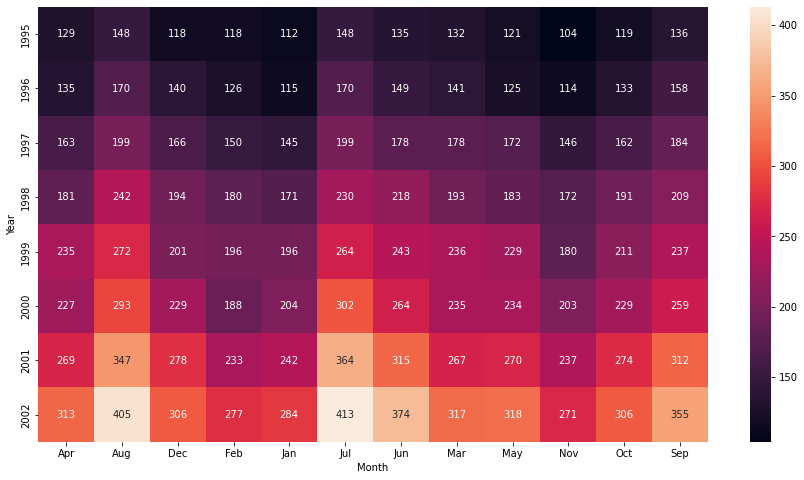

In [58]:
plt.figure(figsize=(15,8))
sns.heatmap(airline_ptable, annot=True, fmt='g')

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

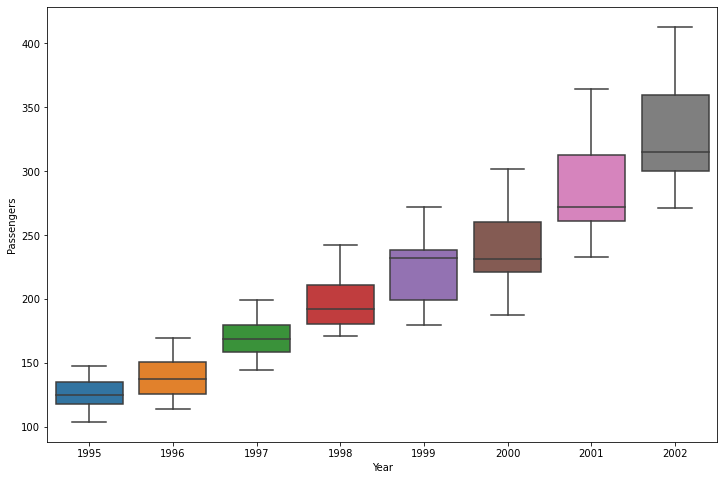

In [59]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Year', y='Passengers', data=airline)

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

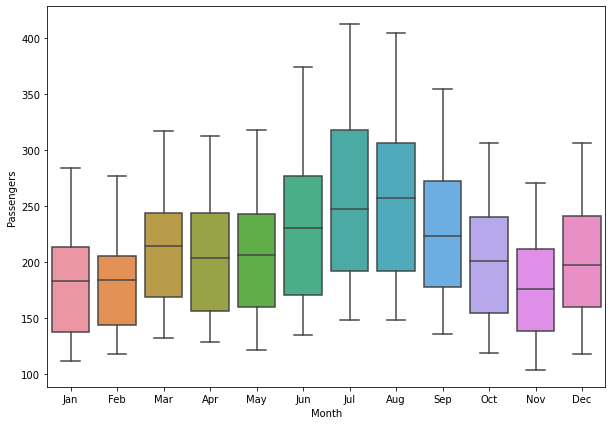

In [60]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Month', y='Passengers', data=airline)

In [61]:
airline['Month'].value_counts()

Jan    8
Feb    8
Mar    8
Apr    8
May    8
Jun    8
Jul    8
Aug    8
Sep    8
Oct    8
Nov    8
Dec    8
Name: Month, dtype: int64

In [62]:
airline['Year'].value_counts()

1995    12
1996    12
1997    12
1998    12
1999    12
2000    12
2001    12
2002    12
Name: Year, dtype: int64

In [63]:
monthdummies = pd.DataFrame(pd.get_dummies(airline['Month']))
airline1 = pd.concat([airline, monthdummies], axis=1)
airline1

,date,Passengers,Year,Month,Date,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995,Jan,01,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,Feb,01,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,Mar,01,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,Apr,01,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,May,01,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002,Sep,01,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002,Oct,01,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002,Nov,01,0,0,0,0,0,0,0,0,0,1,0,0


In [64]:
airline1['t'] = np.arange(1, 97)
airline1['tsquared'] = airline1['t'] ** 2
airline1['logPassengers'] = np.log(airline1['Passengers'])
airline1.columns

Index(['date', 'Passengers', 'Year', 'Month', 'Date', 'Apr', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't',
       'tsquared', 'logPassengers'],
      dtype='object')

In [65]:
airline1

,date,Passengers,Year,Month,Date,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,tsquared,logPassengers
0,1995-01-01,112,1995,Jan,01,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995,Feb,01,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995,Mar,01,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995,Apr,01,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995,May,01,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002,Sep,01,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002,Oct,01,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,2002,Nov,01,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [66]:
train = airline1.head(75)
test = airline1.tail(21)

#### Moving Average Method

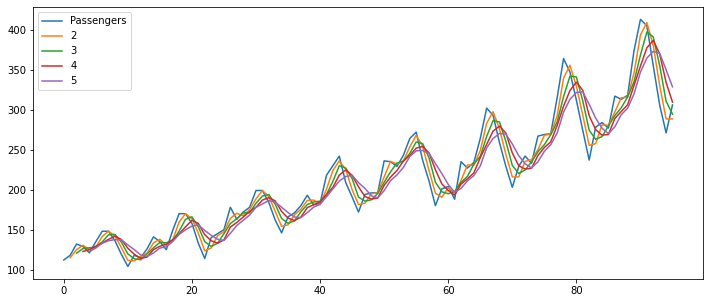

In [67]:
plt.figure(figsize=(12,5))
airline1.Passengers.plot()
for i in range(2, 6):
    airline1['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

#### Time Series Decomposition Plot:

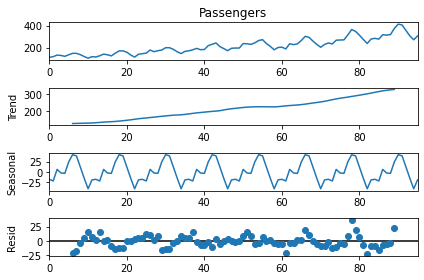

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(airline1.Passengers, period=12)
decompose_ts_add.plot()
plt.show()

##### Linear Model

In [69]:
linear = smf.ols('Passengers~t', data=train).fit()
predlinear = pd.Series(linear.predict(test['t']))
rmselinear = np.sqrt(mean_squared_error(test['Passengers'], predlinear))
print('RMSE Linear : ',rmselinear)

RMSE Linear :  56.023310970926275


##### Exponential Model

In [70]:
exp = smf.ols('logPassengers~t', data=train).fit()
predexp = pd.Series(exp.predict(test['t']))
rmseexp = np.sqrt(mean_squared_error(test['Passengers'], np.exp(predexp)))
print('RMSE Exponential : ', rmseexp)

RMSE Exponential :  45.47042515863816


##### Quadratic Model

In [71]:
quad = smf.ols('Passengers~t+tsquared', data=train).fit()
predquad = pd.Series(quad.predict(test[['t', 'tsquared']]))
rmsequad = np.sqrt(mean_squared_error(test['Passengers'], predquad))
print('RMSE Quadratic : ', rmsequad)

RMSE Quadratic :  58.49113468662631


##### Additive Seasonality

In [72]:
add = smf.ols('Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep', data=train).fit()
predadd = pd.Series(add.predict(test[['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']]))
rmseadd = np.sqrt(mean_squared_error(test['Passengers'], predadd))
print('RMSE Additive Seasonality : ', rmseadd)

RMSE Additive Seasonality :  131.17859681761564


##### Additive Seasonality Quadratic

In [73]:
asq = smf.ols('Passengers~t+tsquared+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep', data=train).fit()
predasq = pd.Series(asq.predict(test[['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 'tsquared']]))
rmseasq = np.sqrt(mean_squared_error(test['Passengers'], predasq))
print('RMSE Additive Seasonality Quadratic : ', rmseasq)

RMSE Additive Seasonality Quadratic :  39.79556149954352


##### Multiplicative Seasonality

In [74]:
multi = smf.ols('logPassengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep', data=train).fit()
predmulti = pd.Series(multi.predict(test))
rmsemulti = np.sqrt(mean_squared_error(test['logPassengers'], np.exp(predmulti)))
print('RMSE Multiplicative Seasonality : ', rmsemulti)

RMSE Multiplicative Seasonality :  176.79765709375909


##### Multiplicative Additive Seasonality 

In [75]:
multiadd = smf.ols('logPassengers~t+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep', data=train).fit()
predmultiadd = pd.Series(multiadd.predict(test))
rmsemultiadd = np.sqrt(mean_squared_error(test['Passengers'], np.exp(predmultiadd)))
print('RMSE Multiplicative Seasonality : ', rmsemultiadd)

RMSE Multiplicative Seasonality :  11.395292897760044


In [76]:
data = {'model':(['linear', 'exp', 'quad', 'add', 'asq', 'multi', 'multiadd']), 
       'rmseval':([rmselinear, rmseexp, rmsequad, rmseadd, rmseasq, rmsemulti, rmsemultiadd])}
rmsedata = pd.DataFrame(data)
rmsedata

,model,rmseval
0,linear,56.023311
1,exp,45.470425
2,quad,58.491135
3,add,131.178597
4,asq,39.795561
5,multi,176.797657
6,multiadd,11.395293


In [77]:
airline1.head()

,date,Passengers,Year,Month,Date,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,tsquared,logPassengers
0,1995-01-01,112,1995,Jan,01,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995,Feb,01,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995,Mar,01,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995,Apr,01,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995,May,01,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [78]:
def RMSE(org, pred):
    rmse = np.sqrt(np.mean((np.array(org) - np.array(pred))**2))
    return rmse

In [79]:
finalmodel = smf.ols('Passengers~t+tsquared+Jan+Feb+Mar+Apr+May', data=airline1).fit()
predfinal = pd.Series(finalmodel.predict(airline1[['Jan', 'Feb', 'Mar', 'Apr', 'May', 't', 'tsquared']]))
rmsefinal = RMSE(airline1['Passengers'], predfinal)
rmsefinal

28.231996030793535

In [80]:
preddf = pd.DataFrame({'Actual' : airline1.Passengers, 'Predicted' : predfinal})
preddf

,Actual,Predicted
0,112,103.036065
1,118,101.980897
2,132,129.925728
3,129,123.120560
4,121,122.190391
...,...,...
91,405,331.600645
92,355,334.881461
93,306,338.184425
94,271,341.509535


In [81]:
pred_data = pd.concat([airline1, round(preddf['Predicted'])], axis=1)
pred_data

,date,Passengers,Year,Month,Date,Apr,Aug,Dec,Feb,Jan,...,Jun,Mar,May,Nov,Oct,Sep,t,tsquared,logPassengers,Predicted
0,1995-01-01,112,1995,Jan,01,0,0,0,0,1,...,0,0,0,0,0,0,1,1,4.718499,103.0
1,1995-02-01,118,1995,Feb,01,0,0,0,1,0,...,0,0,0,0,0,0,2,4,4.770685,102.0
2,1995-03-01,132,1995,Mar,01,0,0,0,0,0,...,0,1,0,0,0,0,3,9,4.882802,130.0
3,1995-04-01,129,1995,Apr,01,1,0,0,0,0,...,0,0,0,0,0,0,4,16,4.859812,123.0
4,1995-05-01,121,1995,May,01,0,0,0,0,0,...,0,0,1,0,0,0,5,25,4.795791,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01,0,1,0,0,0,...,0,0,0,0,0,0,92,8464,6.003887,332.0
92,2002-09-01,355,2002,Sep,01,0,0,0,0,0,...,0,0,0,0,0,1,93,8649,5.872118,335.0
93,2002-10-01,306,2002,Oct,01,0,0,0,0,0,...,0,0,0,0,1,0,94,8836,5.723585,338.0
94,2002-11-01,271,2002,Nov,01,0,0,0,0,0,...,0,0,0,1,0,0,95,9025,5.602119,342.0


Forecast the CocaCola prices data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import date, time, datetime
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [83]:
cola = pd.read_excel('C:/Users/aditi/Downloads/CocaCola_Sales_Rawdata.xlsx')
cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [84]:
cola.shape

(42, 2)

In [85]:
cola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [86]:
cola[cola.duplicated()]

,Quarter,Sales


In [87]:
cola.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [88]:
cola.dtypes

Quarter     object
Sales      float64
dtype: object

<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

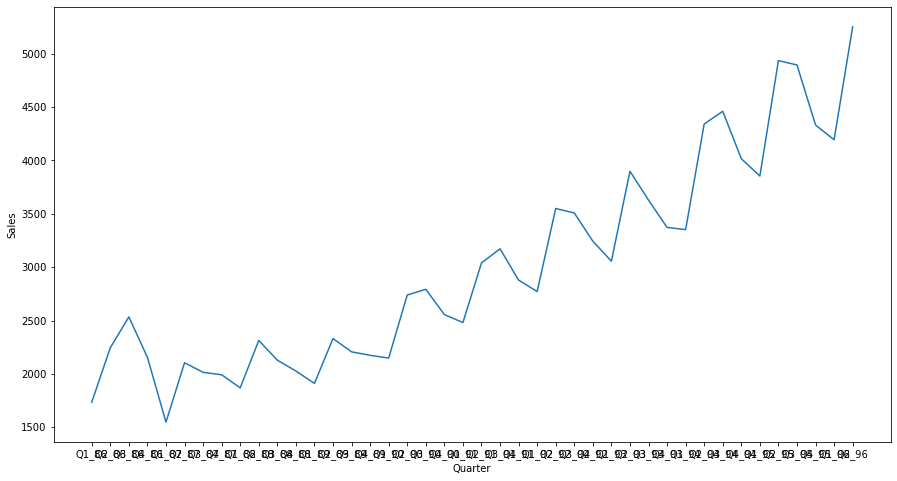

In [89]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = 'Quarter', y = 'Sales', data = cola)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

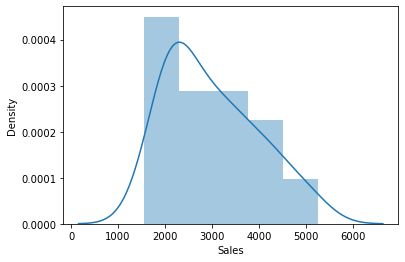

In [90]:
sns.distplot(cola['Sales'])

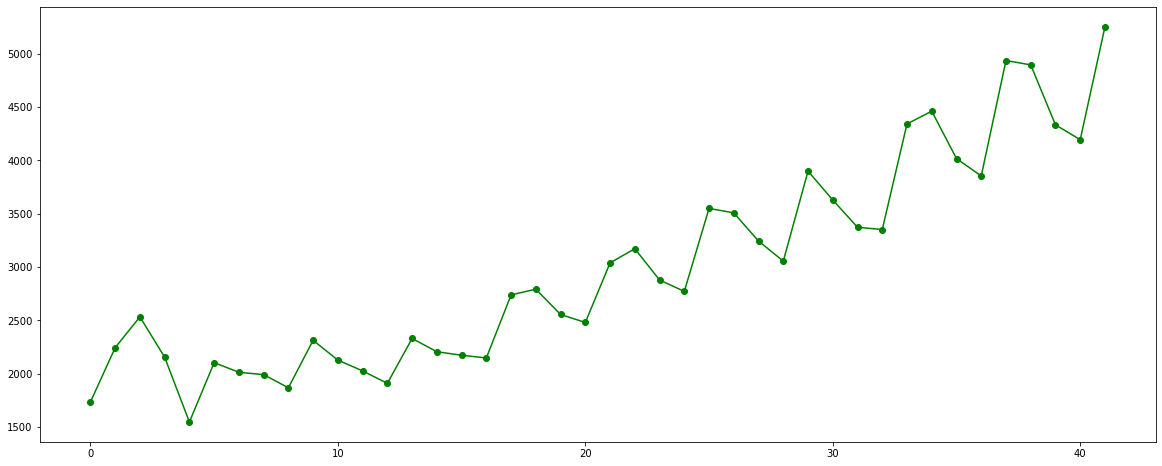

In [91]:
cola['Sales'].plot(figsize = (20, 8), color = 'green', marker = 'o')
plt.show()

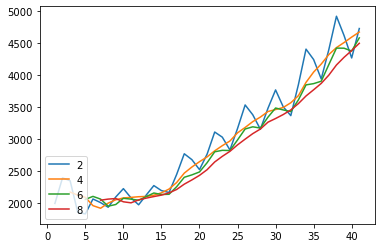

In [92]:
for i in range(2, 10, 2):
    cola['Sales'].rolling(i).mean().plot(label = str(i))
plt.legend(loc=3)

In [93]:
cola['quarter'] = 0
cola['year'] = 0
for i in range(0,42):
    n = cola['Quarter'][i]
    cola['quarter'][i] = n[0:2]
    cola['year'][i] = n[-2:]

In [94]:
cola

,Quarter,Sales,quarter,year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


<AxesSubplot:xlabel='quarter', ylabel='Sales'>

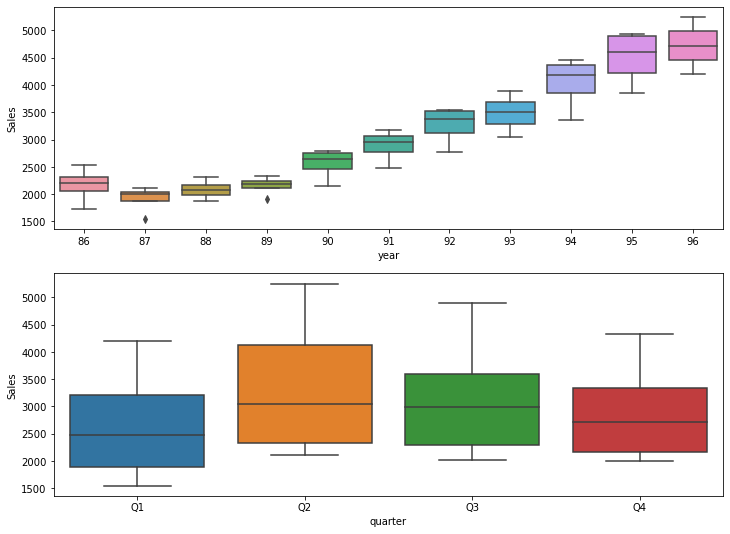

In [95]:
plt.figure(figsize=(12,9))
plt.subplot(211)
sns.boxplot(x = 'year', y = 'Sales', data=cola)
plt.subplot(212)
sns.boxplot(x = 'quarter', y = 'Sales', data=cola)

In [96]:
pivot = pd.pivot_table(data=cola, values='Sales', index='year', columns='quarter', aggfunc='mean', fill_value=0)
round(pivot)

quarter,Q1,Q2,Q3,Q4
year,,,,
86,1735.0,2245.0,2534.0,2155.0
87,1548.0,2104.0,2014.0,1992.0
88,1869.0,2314.0,2128.0,2027.0
89,1911.0,2331.0,2207.0,2174.0
90,2148.0,2739.0,2793.0,2556.0
91,2481.0,3040.0,3172.0,2879.0
92,2772.0,3550.0,3508.0,3244.0
93,3056.0,3899.0,3629.0,3373.0
94,3352.0,4342.0,4461.0,4017.0


<AxesSubplot:xlabel='quarter', ylabel='year'>

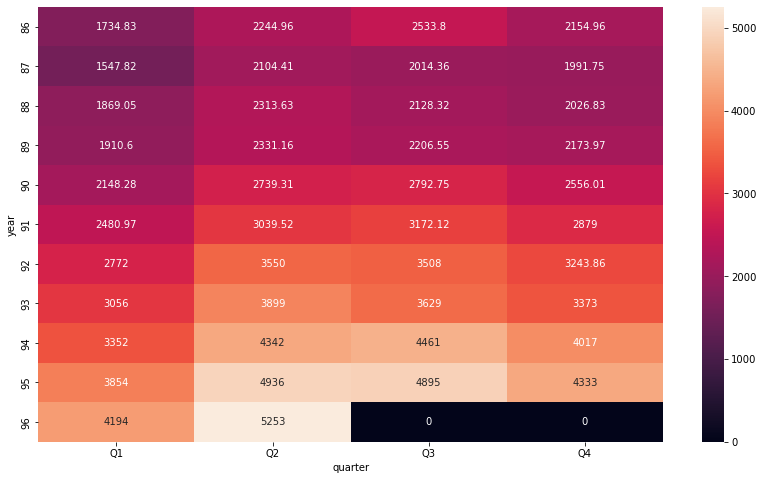

In [97]:
plt.figure(figsize=(14,8))
sns.heatmap(pivot, annot=True, fmt='g')

In [98]:
quarterdum = pd.get_dummies(cola['quarter'])
quarterdum.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [99]:
cola1 = pd.concat([cola, quarterdum], axis=1)
cola1.head()

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [100]:
cola1['t'] = np.arange(1, 43)
cola1['tsquared'] = cola1['t'] ** 2
cola1['logsales'] = np.log(cola1['Sales'])

In [101]:
cola1

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4,t,tsquared,logsales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


In [102]:
train = cola1.head(30)
test = cola1.tail(12)

##### Linear Model

In [103]:
linear = smf.ols('Sales~t', data=train).fit()
predlin = linear.predict(test)
rmselin = np.sqrt(mean_squared_error(test['Sales'], predlin))
print('RMSE Linear : ',rmselin)

RMSE Linear :  714.0144483281305


##### Quadratic Model

In [104]:
quad = smf.ols('Sales~t+tsquared', data=train).fit()
predquad = quad.predict(test)
rmsequad = np.sqrt(mean_squared_error(test['Sales'], predquad))
print('RMSE Quadratic : ',rmsequad)

RMSE Quadratic :  646.2715428312007


##### Exponential Model

In [105]:
exp = smf.ols('logsales~t', data=train).fit()
predexp = exp.predict(test)
rmsexp = np.sqrt(mean_squared_error(test['Sales'], np.exp(predexp)))
print('RMSE Exponential : ',rmsexp)

RMSE Exponential :  552.2821039079263


##### Additive Seasonality

In [106]:
add = smf.ols('Sales~Q1+Q2+Q3+Q4', data=train).fit()
predadd = add.predict(test)
rmseadd = np.sqrt(mean_squared_error(test['Sales'], predadd))
print('RMSE Additive Seasonality : ',rmseadd)

RMSE Additive Seasonality :  1778.0065467941363


##### Additive Seasonality Quadratic

In [107]:
addquad = smf.ols('Sales~t+tsquared+Q1+Q2+Q3+Q4', data=train).fit()
predasq = addquad.predict(test)
rmseasq = np.sqrt(mean_squared_error(test['Sales'], predasq))
print('RMSE Additive Seasonality Quadratic : ',rmseasq)

RMSE Additive Seasonality Quadratic :  586.0533067871103


##### Multiplicative Seasonality

In [108]:
multi = smf.ols('logsales~Q1+Q2+Q3+Q4', data=train).fit()
predmulti = multi.predict(test)
rmsemulti = np.sqrt(mean_squared_error(test['Sales'], np.exp(predmulti)))
print('RMSE Multiplicative Seasonality : ',rmsemulti)

RMSE Multiplicative Seasonality :  1828.9238912138085


##### Multiplicative Addictive Seasonality

In [109]:
multiadd = smf.ols('logsales~t+Q1+Q2+Q3+Q4', data=train).fit()
predmultiadd = multiadd.predict(test)
rmsemultiadd = np.sqrt(mean_squared_error(test['Sales'], np.exp(predmultiadd)))
print('RMSE Multiplicative Additive Seasonality : ',rmsemultiadd)

RMSE Multiplicative Additive Seasonality :  410.24970596079635


##### Comparing the model

In [110]:
data = pd.DataFrame({'Model':(['Linear', 'Quadratic', 'Exponential', 'Additive', 'Additive Seasonality', 'Multiplicative', 'Multiplicative Additive']),
                    'RMSE Val':([rmselin, rmsequad, rmsexp, rmseadd, rmseasq, rmsemulti, rmsemultiadd])})
data

,Model,RMSE Val
0,Linear,714.014448
1,Quadratic,646.271543
2,Exponential,552.282104
3,Additive,1778.006547
4,Additive Seasonality,586.053307
5,Multiplicative,1828.923891
6,Multiplicative Additive,410.249706


In [111]:
cola1.tail()

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4,t,tsquared,logsales
37,Q2_95,4936.0,Q2,95,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,95,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,95,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,96,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,96,0,1,0,0,42,1764,8.566555


In [112]:
modelfinal = smf.ols('Sales~t+Q1+Q2+Q3+Q4+tsquared', data=cola1).fit()
prednew = pd.Series(modelfinal.predict(cola1))
prednew

0     1626.592727
1     2268.402339
2     2189.685821
3     1867.242917
4     1658.311143
5     2314.185178
6     2249.533083
7     1941.154603
8     1746.287252
9     2416.225709
10    2365.638037
11    2071.323979
12    1890.521051
13    2574.523931
14    2538.000682
15    2257.751047
16    2091.012542
17    2789.079845
18    2766.621019
19    2500.435807
20    2347.761724
21    3059.893450
22    3051.499047
23    2799.378257
24    2660.768598
25    3386.964746
26    3392.634766
27    3154.578400
28    3030.033163
29    3770.293734
30    3790.028177
31    3566.036233
32    3455.555419
33    4209.880414
34    4243.679279
35    4033.751758
36    3937.335367
37    4705.724784
38    4753.588072
39    4557.724974
40    4475.373006
41    5257.826846
dtype: float64

In [113]:
preddf = pd.DataFrame({'Actual' : cola1.Sales, 'Predicted' : prednew})
preddf

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


In [114]:
cola1['Forecasted Sales']  = pd.DataFrame(prednew)
cola1

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4,t,tsquared,logsales,Forecasted Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663,1626.592727
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443,2268.402339
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477,2189.685821
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529,1867.242917
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602,1658.311143
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791,2314.185178
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058,2249.533083
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767,1941.154603
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186,1746.287252
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574,2416.225709
